(950, 750, 3)
(950, 750, 3)

The best OTSU Threshold:  [29]


'\ncv2.imwrite("..\\RXX-2020-CVA\\Testing dataset\\TianJing-SPOT/subtrcat.bmp",thread1)\ncv2.imwrite("..\\RXX-2020-CVA\\Testing dataset\\TianJing-SPOT/divide.bmp",thread2)\ncv2.imwrite("..\\RXX-2020-CVA\\Testing dataset\\TianJing-SPOT/cva.bmp",thread3)\n'

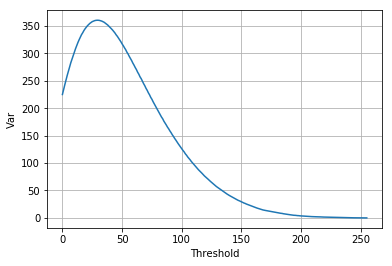

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

from test2 import  CD_diff
from test2 import divede,cva,divede
from eveluate import evevalue_it
import numpy as np


img1=cv2.imread(r'C:\Users\dell\Desktop\RXX-2020-CVA\RXX-2020-CVA\Testing dataset\B-landslideAerialImage/2007dopdyssub2B_CopyRaster.tif')
img2=cv2.imread(r'C:\Users\dell\Desktop\RXX-2020-CVA\RXX-2020-CVA\Testing dataset\B-landslideAerialImage/2014dopdyssubB_CopyRaster.tif')

print(img1.shape)
print(img2.shape)

def Find_Threshold(delta):#OTSU寻找阈值
    # 求灰度方差最大的那个数
    #主要是利用方差来进行计算

    val=np.zeros([256])
    for th in range(256):
        loc1=delta>th
        # loc1 为true 或false 的矩阵
        loc2=delta<=th
        '''delta[loc1]=255
        delta[loc2]=0'''
        #delta[loc1] 将为True 的矩阵元素提取出来为1维
        if delta[loc1].size==0:
            mu1=0
            omega1=0
        else:
            mu1=np.mean(delta[loc1])
            #平均值
            omega1=delta[loc1].size/delta.size
            # 所占比例
        if delta[loc2].size==0:
            mu2=0
            omega2=0
        else:
            mu2=np.mean(delta[loc2])
            omega2=delta[loc2].size/delta.size
        
        #最终推导的公式为  g=w0*w1*()
        # 这里使用了最后的推导公式原文地址https://blog.csdn.net/guoyk1990/article/details/7606032?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.nonecase&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.nonecase
        val[th]=omega1*omega2*np.power((mu1-mu2),2)

    #print("val=",val.shape)
    plt.figure()
    # val 存放的是类间方差 取其最大
    loc=np.where(val==np.max(val))
    #x=np.arange(0,256,1)
    #x=x.reshape([1,256])
    plt.plot(val)
    plt.ylabel("Var")
    plt.xlabel("Threshold")
    plt.grid("on")

    print("\nThe best OTSU Threshold: ",loc[0])
    return loc[0]
# 噪声处理
def median_blur_demo(image):    # 中值模糊  对椒盐噪声有很好的去燥效果
    dst = cv2.medianBlur(image, 5)
    return dst

(row,cloun,dim)=img1.shape

def CD_diff(img1,img2):#影像差值法
    #img1=median_blur_demo(img1)
    #img2=median_blur_demo(img2)
    sh=img1.shape
    delta=cv2.subtract(img1,img2)
    th=Find_Threshold(delta)
    # 设为灰度值 再进行运算
    delta = cv2.cvtColor(delta, cv2.COLOR_BGR2GRAY)
    #print(delta.min())
    if np.size(th)>1:
        th=th[0]
    for i1 in range(sh[0]):
        for i2 in range(sh[1]):
            if delta[i1][i2]>=th:
                delta[i1][i2]=255
            else:
                delta[i1][i2]=0
    return delta


diff=CD_diff(img1,img2)


#plt.show()
#膨胀操作
#thread1=cv2.dilate(thread1,kernel,iterations=1)
cv2.imshow('diff',diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 保存图片
'''
cv2.imwrite("..\RXX-2020-CVA\Testing dataset\TianJing-SPOT/subtrcat.bmp",thread1)
cv2.imwrite("..\RXX-2020-CVA\Testing dataset\TianJing-SPOT/divide.bmp",thread2)
cv2.imwrite("..\RXX-2020-CVA\Testing dataset\TianJing-SPOT/cva.bmp",thread3)
'''